In [14]:
import os
import sys
from pathlib import Path

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px
import plotly.graph_objects as go

In [15]:
df_rs1 = pd.read_feather('../datasets/rings_server1.feather')
df_rt2 = pd.read_feather('../datasets/rings_tools2.feather')

In [31]:
df_rs1.sample(5)

,ip,identd,userid,datetime,request,status,size,referer,user_agent,date,month_year,DOW,hour
7257217,136.243.148.178,None,None,2021-12-27 01:25:19+00:00,GET /saturn/vgr2_iss/PIA02274.html HTTP/1.1,200,14989.0,None,Mozilla/5.0 (compatible; DataForSeoBot/1.0; +h...,2021-12-27,12-2021,Monday,1
3643265,96.126.121.123,None,None,2021-03-15 12:59:18+00:00,GET /holdings/volumes/HSTIx_xxxx/HSTI1_2897/DA...,200,12257.0,None,Mozilla/5.0 (Windows NT 10.0; WOW64) AppleWebK...,2021-03-15,03-2021,Monday,12
9778250,51.222.253.11,None,None,2022-01-23 12:53:58+00:00,GET /pds4/bundles/cassini_vims_saturn/data_raw...,200,40352.0,None,Mozilla/5.0 (compatible; AhrefsBot/7.0; +http:...,2022-01-23,01-2022,Sunday,12
6535437,5.188.48.227,None,None,2021-08-23 15:52:13+00:00,GET /voyager/pps/data.html HTTP/1.0,200,14404.0,https://pds-rings.seti.org/voyager/pps/data.html,Mozilla/5.0 (Windows NT 10.0; ) AppleWebKit/53...,2021-08-23,08-2021,Monday,15
10062739,51.222.253.13,None,None,2022-01-26 04:30:18+00:00,GET /pds4/bundles/cassini_vims_cruise/data_raw...,200,38258.0,None,Mozilla/5.0 (compatible; AhrefsBot/7.0; +http:...,2022-01-26,01-2022,Wednesday,4


In [30]:
df_rt2.sample(5)

,ip,identd,userid,datetime,request,status,size,referer,user_agent,date,month_year,DOW,hour
2443521,10.1.6.151,None,None,2021-10-09 08:46:05+00:00,GET / HTTP/1.1,200,132631,None,Zabbix,2021-10-09,10-2021,Saturday,8
30770,71.204.165.227,None,None,2020-05-04 23:47:05+00:00,GET /__api/dataimages.json?COUVISchannel=HSP&i...,200,1119,None,python-requests/2.22.0,2020-05-04,05-2020,Monday,23
237581,73.15.49.89,None,None,2020-06-20 21:51:47+00:00,"GET /opus/__menu.json?cols=opusid,instrument,p...",200,11560,https://opus.pds-rings.seti.org/opus/,Mozilla/5.0 (Windows NT 10.0; Win64; x64) Appl...,2020-06-20,06-2020,Saturday,21
1151839,145.255.3.233,None,None,2021-02-07 15:54:38+00:00,GET /opus/__lastblogupdate.json HTTP/1.1,200,629,https://opus.pds-rings.seti.org/opus/,Mozilla/5.0 (Windows NT 10.0; Win64; x64) Appl...,2021-02-07,02-2021,Sunday,15
2866017,174.198.15.31,None,None,2022-01-16 16:03:19+00:00,GET /opus/__api/normalizeinput.json?time2_101=...,200,427,https://opus.pds-rings.seti.org/opus/,Mozilla/5.0 (iPhone; CPU iPhone OS 15_1 like M...,2022-01-16,01-2022,Sunday,16


In [17]:
df_rs1.describe()

,status,size,hour
count,1.258658e+07,1.212591e+07,1.258658e+07
mean,2.127988e+02,1.933060e+06,1.197231e+01
std,4.648065e+01,1.012340e+08,6.999718e+00
min,2.000000e+02,1.000000e+00,0.000000e+00
25%,2.000000e+02,2.499000e+03,6.000000e+00
50%,2.000000e+02,1.765500e+04,1.200000e+01
75%,2.000000e+02,2.540500e+04,1.800000e+01
max,5.040000e+02,5.029008e+10,2.300000e+01


In [18]:
df_sum = (
    df_rs1.groupby(by=['month_year', 'date']).agg({'size': 'sum', 'ip': 'count'}).
    reset_index(drop=False).rename(columns={'size': 'data_transmit (GB)', 'ip': 'requests'})
)

# Basic Transformations
df_sum['data_transmit (GB)'] = df_sum['data_transmit (GB)'] / (8 * 10**9)
df_sum['date'] = pd.to_datetime(df_sum['date'])
df_sum['data_transmit_range'] = pd.cut(df_sum['data_transmit (GB)'], 
                                       bins=[0, .1, 1, 10, 100, 200, 500, 1000, 100000],
                                       labels=['0-100MB', '100MB-1GB', '1-10GB', '10-100GB', '100-200GB', '200-500GB', 
                                               '500GB-1TB', '>1TB'])
print(df_sum.dtypes)
df_sum.sort_values(by='data_transmit (GB)', ascending=False)

month_year                     object
date                   datetime64[ns]
data_transmit (GB)            float64
requests                        int64
data_transmit_range          category
dtype: object


,month_year,date,data_transmit (GB),requests,data_transmit_range
112,03-2021,2021-03-03,530.326558,25054,500GB-1TB
132,03-2021,2021-03-23,234.529395,49422,200-500GB
139,03-2021,2021-03-30,171.423931,44580,100-200GB
52,01-2022,2022-01-22,126.169917,147133,100-200GB
56,01-2022,2022-01-26,120.026972,98200,100-200GB
...,...,...,...,...,...
433,12-2021,2021-12-17,0.001166,412,0-100MB
394,11-2021,2021-11-29,0.001031,72,0-100MB
392,11-2021,2021-11-24,0.001021,388,0-100MB
395,11-2021,2021-11-30,0.000077,360,0-100MB


In [19]:
df_sum.median()

/var/folders/1y/9ndq9fyj33d9xdqgm6r3jtfw0000gq/T/ipykernel_14493/2723020856.py:1: FutureWarning:

DataFrame.mean and DataFrame.median with numeric_only=None will include datetime64 and datetime64tz columns in a future version.

/var/folders/1y/9ndq9fyj33d9xdqgm6r3jtfw0000gq/T/ipykernel_14493/2723020856.py:1: FutureWarning:

Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.



data_transmit (GB)        0.891865
requests              14391.500000
dtype: float64

/Users/kaipak/miniconda3/envs/dask/lib/python3.10/site-packages/seaborn/distributions.py:2619: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).



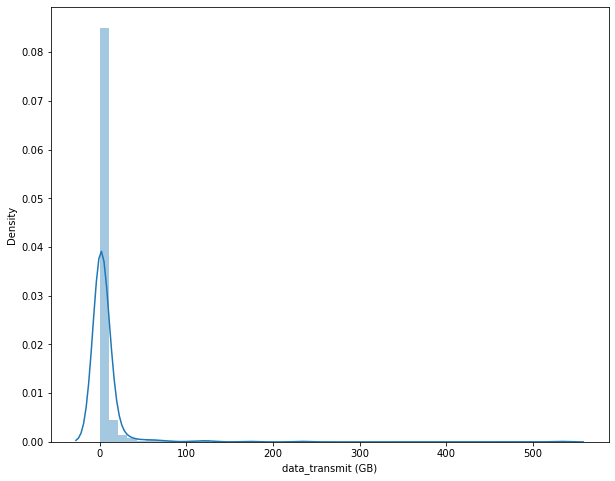

In [20]:
fig, ax = plt.subplots(figsize=(10, 8))
distplot = sns.distplot(df_sum['data_transmit (GB)'], ax=ax)

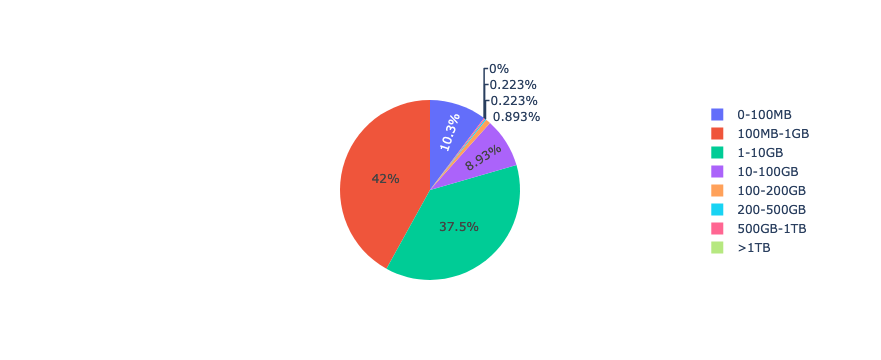

In [21]:
df_pie = df_sum.groupby(by='data_transmit_range').size().to_frame('count').reset_index() 
df_pie.head()
# fig = px.pie(df_pie, values='count', names='data_transmit_range', sort=True)
fig = go.Figure(
          data=[go.Pie(
              labels=df_pie['data_transmit_range'], values=df_pie['count'], sort=False)
               ]
)
fig.show()

In [24]:
df_sum

,month_year,date,data_transmit (GB),requests,data_transmit_range
0,01-2021,2021-01-01,0.557415,7197,100MB-1GB
1,01-2021,2021-01-02,2.467222,30951,1-10GB
2,01-2021,2021-01-03,2.802329,18496,1-10GB
3,01-2021,2021-01-04,1.272079,24976,1-10GB
4,01-2021,2021-01-05,0.636384,10721,100MB-1GB
...,...,...,...,...,...
443,12-2021,2021-12-27,1.621433,58722,1-10GB
444,12-2021,2021-12-28,2.666673,82817,1-10GB
445,12-2021,2021-12-29,2.335619,83899,1-10GB
446,12-2021,2021-12-30,4.657401,93862,1-10GB


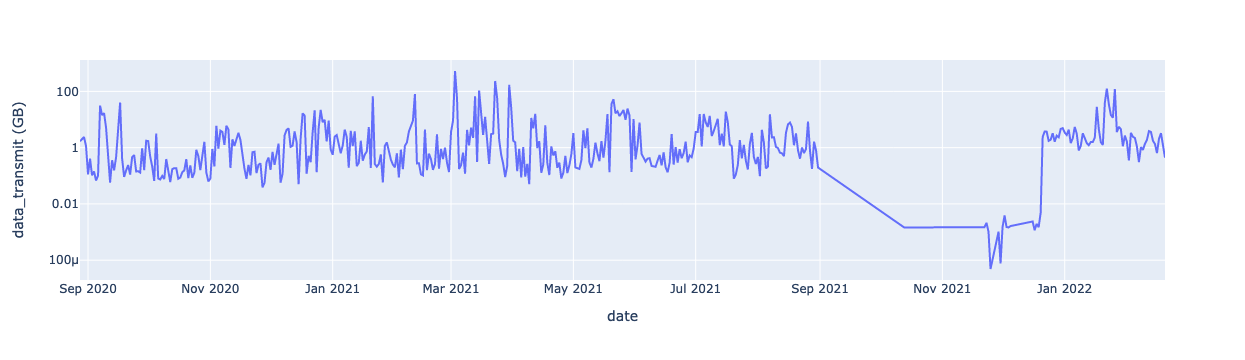

In [32]:
# Overall Node Transmit rate
df_sum.sort_values(by='date', inplace=True)
fig = px.line(df_sum, x="date", y="data_transmit (GB)", log_y=True)
fig.show()

In [10]:
df_sum = (
    df_rs1.groupby(by=['request']).agg({'size': 'sum', 'ip': 'count'}).
    reset_index(drop=False).rename(columns={'size': 'data_transmit(GB)', 'ip': 'requests'})
)
df_sum['data_transmit(GB)'] = df_sum['data_transmit(GB)'] / 10**9
print(df_sum.dtypes)
df_sum.head()

request               object
data_transmit(GB)    float64
requests               int64
dtype: object


,request,data_transmit(GB),requests
0,\n,5.824020e-04,2577
1,,1.356000e-06,6
2,þÿ,4.520000e-07,2
3,0,1.130000e-06,5
4,<SCRIPT>NXSSTEST</SCRIPT> / HTTP/1.1,1.356000e-06,6


In [11]:
df_sum.sort_values(by='data_transmit(GB)', ascending=False, inplace=True)

<AxesSubplot:xlabel='data_transmit(GB)', ylabel='request'>

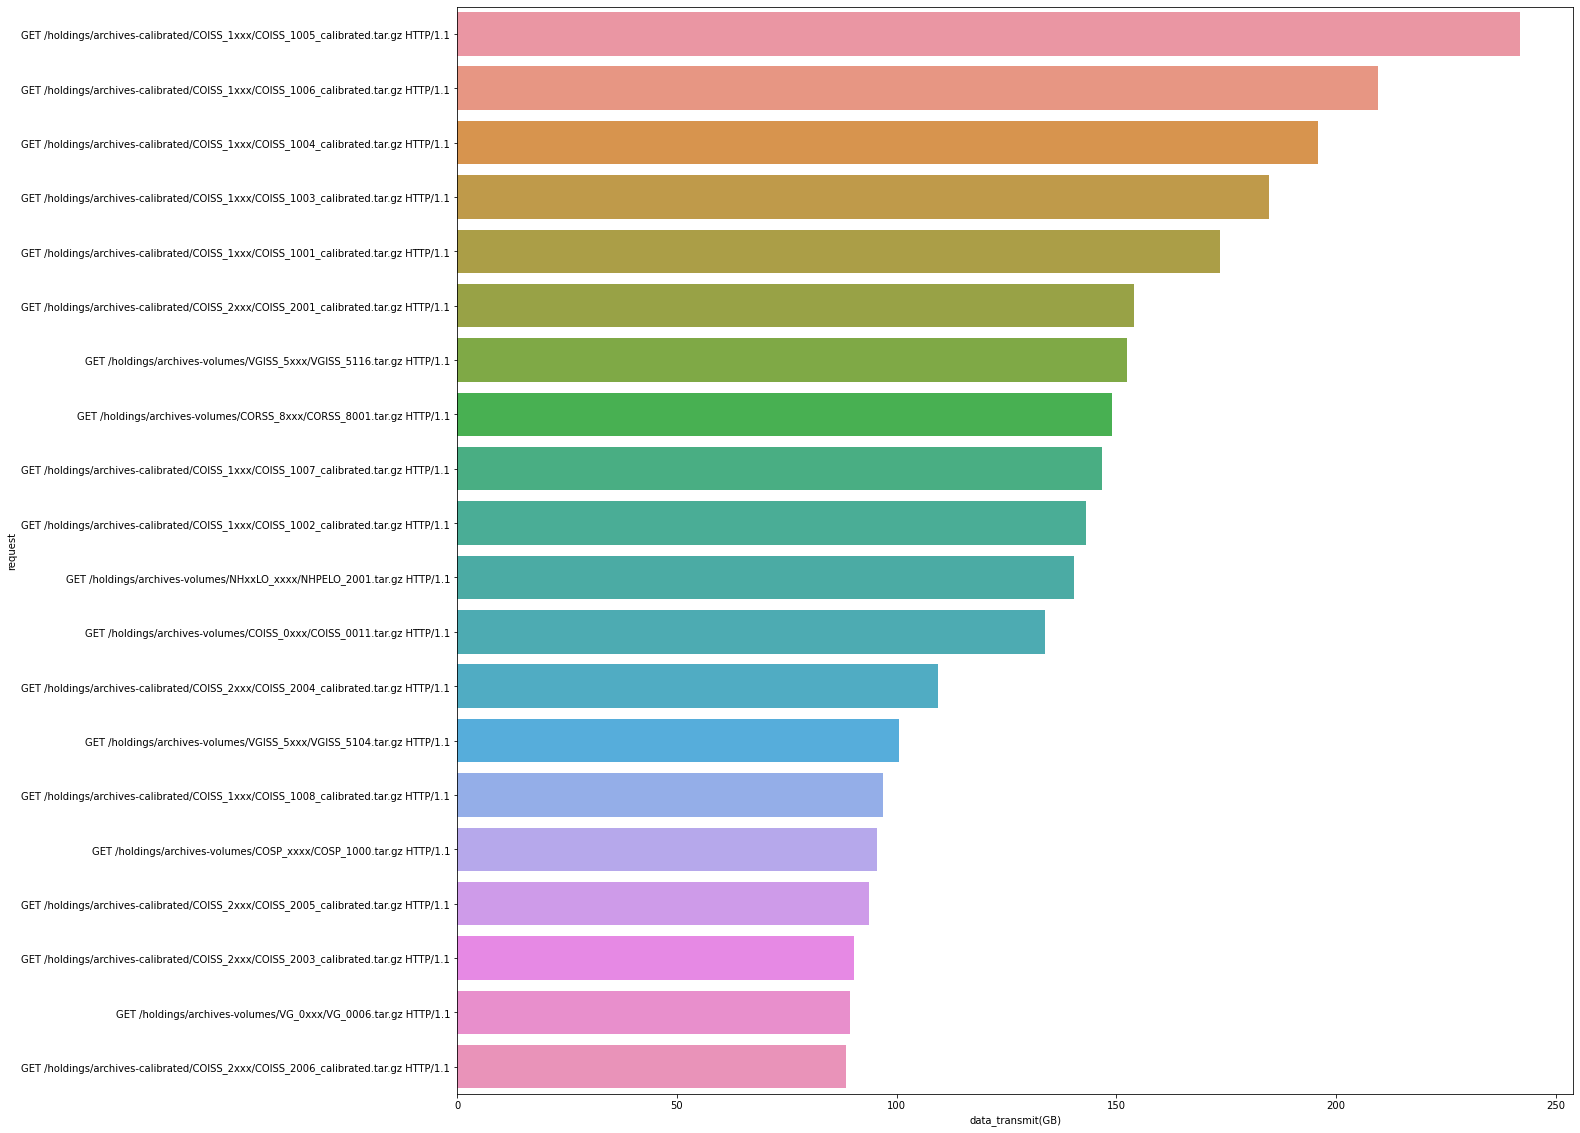

In [12]:
fig, ax = plt.subplots(figsize=(20, 20))
sns.barplot(data=df_sum[:20], y='request', x='data_transmit(GB)', orient='h')

## Difference Between Log Files
- tools2: seems like anything related to OPUS. That seems like the biggest tool in logs?
  - beware: there looks like several different URLs related to OPUS